# Twice-around-the-tree


Hamiltonian Cycle: [(0, 6), (6, 5), (5, 4), (4, 6), (6, 3), (3, 5), (5, 2), (2, 4), (4, 3), (3, 2), (2, 6), (6, 1), (1, 5), (5, 0), (0, 4), (4, 1), (1, 3), (3, 0), (0, 2), (2, 1), (1, 0)]


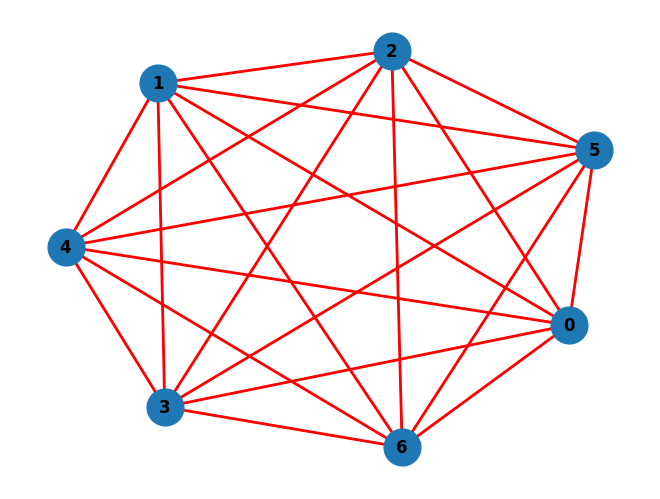

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def twice_around_the_tree(graph):
    # Construir uma árvore geradora mínima (MST)
    mst_edges = list(nx.minimum_spanning_edges(graph, algorithm='prim', data=False))
    mst = nx.Graph(mst_edges)

    # Duplicar cada aresta da MST
    duplicated_edges = [(u, v, data) for u, v, data in mst.edges(data=True)]
    graph.add_edges_from(duplicated_edges)

    # Encontrar um ciclo euleriano
    eulerian_cycle = list(nx.eulerian_circuit(graph))

    # Remover duplicatas e obter o ciclo hamiltoniano
    hamiltonian_cycle = list(dict.fromkeys(eulerian_cycle))

    return hamiltonian_cycle


# Criar um grafo completo ponderado (substitua com seus próprios dados)
G = nx.complete_graph(7)
for u, v in G.edges():
    G[u][v]['weight'] = 1

# Aplicar o algoritmo Twice Around the Tree
hamiltonian_cycle = twice_around_the_tree(G)

# Imprimir o ciclo hamiltoniano
print("Hamiltonian Cycle:", hamiltonian_cycle)

# Desenhar o grafo e o ciclo hamiltoniano
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700)
nx.draw_networkx_edges(G, pos, edgelist=hamiltonian_cycle, edge_color='r', width=2)
plt.show()

# algoritmo de christofildes


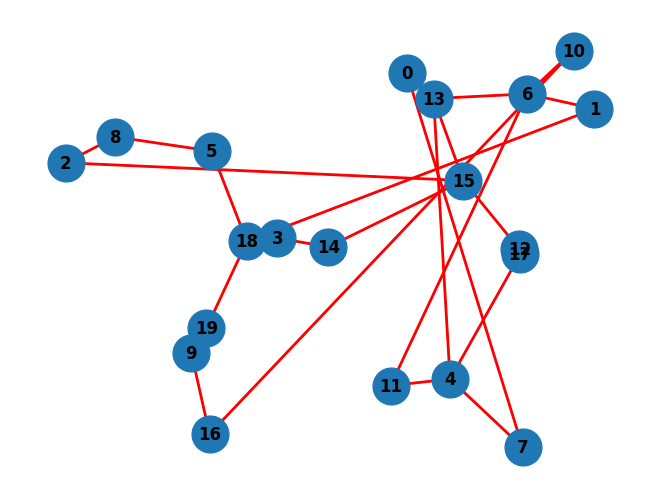

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import euclidean

def euclidean_distance(point1, point2):
    return euclidean(point1, point2)

def christofides_algorithm(points):
    # Criar grafo completo ponderado
    G = nx.Graph()
    for i, point1 in enumerate(points):
        for j, point2 in enumerate(points):
            if i != j:
                distance = euclidean_distance(point1, point2)
                G.add_edge(i, j, weight=distance)

    # Etapa 1: Construir uma Árvore Geradora Mínima
    mst = nx.minimum_spanning_tree(G)

    # Etapa 2: Encontrar vértices de grau ímpar
    odd_vertices = [node for node, degree in mst.degree() if degree % 2 == 1]

    # Etapa 3: Resolver o Problema do Matching Perfeito Mínimo
    odd_vertices_graph = G.subgraph(odd_vertices)
    min_weight_matching = nx.max_weight_matching(odd_vertices_graph, maxcardinality=True)

    # Etapa 4: Combinação das Soluções
    combined_edges = list(mst.edges) + list(min_weight_matching)

    # Etapa 5: Encontrar o Ciclo Hamiltoniano
    eulerian_circuit = list(nx.eulerian_circuit(nx.Graph(combined_edges)))
    hamiltonian_cycle = list(dict.fromkeys(eulerian_circuit))

    return hamiltonian_cycle

# Exemplo de uso
if __name__ == '__main__':
    # Criar pontos no plano euclidiano
    np.random.seed(20)
    points = np.random.rand(20, 2)  # 10 pontos aleatórios no plano

    # Aplicar o algoritmo de Christofides
    hamiltonian_cycle = christofides_algorithm(points)

    # Desenhar o grafo e o ciclo hamiltoniano
    G = nx.Graph()
    G.add_nodes_from(range(len(points)))
    G.add_edges_from(hamiltonian_cycle)

    pos = {i: point for i, point in enumerate(points)}
    nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700)
    nx.draw_networkx_edges(G, pos, edgelist=hamiltonian_cycle, edge_color='r', width=2)
    plt.show()


#branch-and-bound


Hamiltonian Cycle: [0, 2, 5, 1, 3, 6, 4]


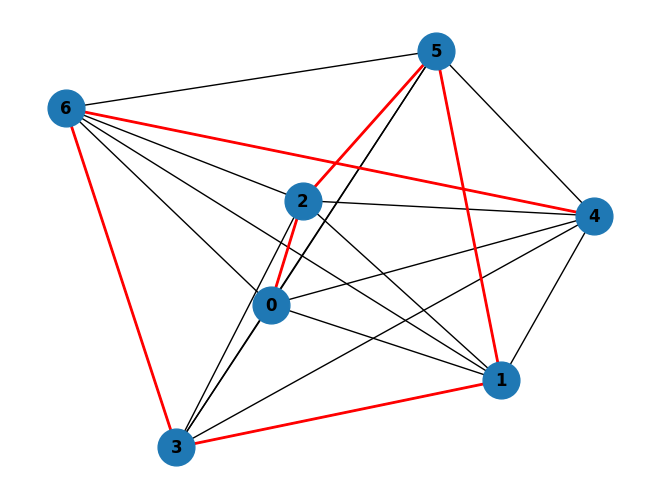

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

def tsp_branch_and_bound(graph):
    n = len(graph)

    # Inicializar a matriz de custo e a lista de visitados
    cost_matrix = np.array(graph)
    visited = [False] * n

    # Inicializar o custo da solução ótima
    optimal_cost = float('inf')
    optimal_path = []

    def branch_and_bound_helper(curr_node, curr_cost, remaining_nodes, current_path):
        nonlocal optimal_cost, optimal_path

        # Atualizar a matriz de custo para o nó atual
        cost_matrix[:, curr_node] = float('inf')
        cost_matrix[curr_node, :] = float('inf')

        # Atualizar o caminho atual
        current_path.append(curr_node)

        # Verificar se todos os nós foram visitados
        if not remaining_nodes:
            # Adicionar o custo do último para o primeiro nó para fechar o ciclo
            curr_cost += graph[curr_node][current_path[0]]

            if curr_cost < optimal_cost:
                optimal_cost = curr_cost
                optimal_path = current_path.copy()

            # Remover o último nó para voltar à chamada anterior
            current_path.pop()
            return

        # Branch-and-Bound recursivo para os nós restantes
        for node in remaining_nodes:
            if graph[curr_node][node] != float('inf') and curr_cost + graph[curr_node][node] < optimal_cost:
                visited[node] = True
                branch_and_bound_helper(node, curr_cost + graph[curr_node][node], remaining_nodes - {node}, current_path)
                visited[node] = False

        # Remover o último nó para voltar à chamada anterior
        current_path.pop()

    # Iniciar o Branch-and-Bound a partir de cada nó
    for start_node in range(n):
        visited[start_node] = True
        branch_and_bound_helper(start_node, 0, set(range(n)) - {start_node}, [])

    return optimal_path

# Criar um grafo completo ponderado (substitua com seus próprios dados)
G = nx.complete_graph(7)
for u, v in G.edges():
    G[u][v]['weight'] = np.random.randint(1, 10)  # Peso aleatório apenas para exemplo

# Extrair a matriz de adjacência
adj_matrix = nx.to_numpy_array(G)

# Aplicar o algoritmo Branch-and-Bound
hamiltonian_cycle = tsp_branch_and_bound(adj_matrix)

# Imprimir o ciclo hamiltoniano
print("Hamiltonian Cycle:", hamiltonian_cycle)

# Desenhar o grafo e o ciclo hamiltoniano
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700)
nx.draw_networkx_edges(G, pos, edgelist=[(hamiltonian_cycle[i], hamiltonian_cycle[i + 1]) for i in range(len(hamiltonian_cycle) - 1)], edge_color='r', width=2)
plt.show()